In [3]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Arrays

In [5]:
my_array = make_array(1, 2, 3, 4)
my_array

array([1, 2, 3, 4])

In [6]:
my_array * 2

array([2, 4, 6, 8])

In [8]:
# my_array is unchanged, just like when we call select/drop/etc on Tables
my_array 

array([1, 2, 3, 4])

In [9]:
another_array = make_array(5, 6, 7, 8)
another_array

array([5, 6, 7, 8])

In [10]:
my_array + another_array

array([ 6,  8, 10, 12])

In [13]:
shorter = make_array(5, 6, 7)
shorter

array([5, 6, 7])

In [14]:
shorter + my_array

ValueError: operands could not be broadcast together with shapes (3,) (4,) 

In [16]:
strings_array = make_array('ok', 'ya', 'hm')
strings_array

array(['ok', 'ya', 'hm'], dtype='<U2')

In [17]:
strings_array * 2

TypeError: ufunc 'multiply' did not contain a loop with signature matching types dtype('<U3') dtype('<U3') dtype('<U3')

In [18]:
my_array

array([1, 2, 3, 4])

In [21]:
sum(my_array) / len(my_array)

2.5

In [22]:
np.average(my_array)

2.5

In [33]:
another_array

array([1, 2, 3, 4])

In [37]:
another_array.item(1)

6

In [35]:
another_array

array([5, 6, 7, 8])

In [36]:
another_array.item(0)

5

## Ranges ##

In [25]:
make_array(0, 1, 2, 3, 4, 5, 6)

array([0, 1, 2, 3, 4, 5, 6])

In [26]:
np.arange(6)

array([0, 1, 2, 3, 4, 5])

In [28]:
np.arange(7)

array([0, 1, 2, 3, 4, 5, 6])

In [29]:
np.arange(5, 11)

array([ 5,  6,  7,  8,  9, 10])

In [30]:
np.arange(0, 20, 2)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [32]:
np.arange(0, 21, 2)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20])

In [31]:
np.arange(0, 1, 0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [41]:
a = np.arange(8)

In [42]:
a

array([0, 1, 2, 3, 4, 5, 6, 7])

In [43]:
a.item(8)

IndexError: index 8 is out of bounds for axis 0 with size 8

## Creating a Table from Scratch ##

In [45]:
streets = make_array('Bancroft', 'Durant', 'Channing', 'Haste')
streets

array(['Bancroft', 'Durant', 'Channing', 'Haste'], dtype='<U8')

In [46]:
Table()

In [50]:
southside = Table().with_column('Streets', streets)
southside

Streets
Bancroft
Durant
Channing
Haste


In [51]:
southside.with_column('Blocks from campus', np.arange(4))

Streets,Blocks from campus
Bancroft,0
Durant,1
Channing,2
Haste,3


In [52]:
southside

Streets
Bancroft
Durant
Channing
Haste


In [53]:
southside = southside.with_column('Blocks from campus', np.arange(4))
southside

Streets,Blocks from campus
Bancroft,0
Durant,1
Channing,2
Haste,3


In [54]:
southside.labels

('Streets', 'Blocks from campus')

In [55]:
southside.num_columns

2

In [35]:
southside.num_rows

4

## Reading a Table from a File  ##

In [57]:
minard = Table.read_table('minard.csv')
minard

Longitude,Latitude,City,Direction,Survivors
24,54.9,Kaunas,Advance,340000
30.2,55.2,Vitebsk,Advance,175000
32,54.8,Smolensk,Advance,145000
37.6,55.8,Moscow,Advance,100000
34.3,55.2,Vyazma,Retreat,55000
32,54.6,Smolensk,Retreat,24000
30.4,54.4,Orsha,Retreat,20000
26.8,54.3,Maladyechna,Retreat,12000
24.1,54.4,Kaunas,Retreat,4000


In [67]:
# Find the southernmost city along the retreat.
southernmost_city = ...

In [60]:
minard.select('City')

City
Kaunas
Vitebsk
Smolensk
Moscow
Vyazma
Smolensk
Orsha
Maladyechna
Kaunas


In [58]:
minard.column('City')

array(['Kaunas', 'Vitebsk', 'Smolensk', 'Moscow', 'Vyazma', 'Smolensk',
       'Orsha', 'Maladyechna', 'Kaunas'], dtype='<U11')

In [59]:
minard.column('Survivors')

array([340000, 175000, 145000, 100000,  55000,  24000,  20000,  12000,
         4000])

In [62]:
initial_size = minard.column('Survivors').item(0)
initial_size

340000

In [63]:
minard.column('Survivors') / initial_size

array([1.        , 0.51470588, 0.42647059, 0.29411765, 0.16176471,
       0.07058824, 0.05882353, 0.03529412, 0.01176471])

In [64]:
minard = minard.with_column(
    'Pct alive', 
    minard.column('Survivors') / initial_size)
minard

Longitude,Latitude,City,Direction,Survivors,Pct alive
24,54.9,Kaunas,Advance,340000,1
30.2,55.2,Vitebsk,Advance,175000,0.514706
32,54.8,Smolensk,Advance,145000,0.426471
37.6,55.8,Moscow,Advance,100000,0.294118
34.3,55.2,Vyazma,Retreat,55000,0.161765
32,54.6,Smolensk,Retreat,24000,0.0705882
30.4,54.4,Orsha,Retreat,20000,0.0588235
26.8,54.3,Maladyechna,Retreat,12000,0.0352941
24.1,54.4,Kaunas,Retreat,4000,0.0117647


In [65]:
minard.set_format('Pct alive', PercentFormatter)

Longitude,Latitude,City,Direction,Survivors,Pct alive
24,54.9,Kaunas,Advance,340000,100.00%
30.2,55.2,Vitebsk,Advance,175000,51.47%
32,54.8,Smolensk,Advance,145000,42.65%
37.6,55.8,Moscow,Advance,100000,29.41%
34.3,55.2,Vyazma,Retreat,55000,16.18%
32,54.6,Smolensk,Retreat,24000,7.06%
30.4,54.4,Orsha,Retreat,20000,5.88%
26.8,54.3,Maladyechna,Retreat,12000,3.53%
24.1,54.4,Kaunas,Retreat,4000,1.18%


In [66]:
minard.column('Pct alive')

array([1.        , 0.51470588, 0.42647059, 0.29411765, 0.16176471,
       0.07058824, 0.05882353, 0.03529412, 0.01176471])

## Selecting data in a column ##

In [72]:
movies = Table.read_table('movies_by_year_with_ticket_price.csv')
movies.show()

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie
2015,8.43,11128.5,702,Star Wars: The Force Awakens
2014,8.17,10360.8,702,American Sniper
2013,8.13,10923.6,688,Catching Fire
2012,7.96,10837.4,667,The Avengers
2011,7.93,10174.3,602,Harry Potter / Deathly Hallows (P2)
2010,7.89,10565.6,536,Toy Story 3
2009,7.5,10595.5,521,Avatar
2008,7.18,9630.7,608,The Dark Knight
2007,6.88,9663.8,631,Spider-Man 3
2006,6.55,9209.5,608,Dead Man's Chest


In [74]:
gross_in_dollars = movies.column('Total Gross') * 1e6
tix_sold = gross_in_dollars / movies.column('Average Ticket Price')

In [75]:
movies = movies.with_column('Tickets sold', tix_sold)

In [76]:
movies.show(4)

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie,Tickets sold
2015,8.43,11128.5,702,Star Wars: The Force Awakens,1.32011e+09
2014,8.17,10360.8,702,American Sniper,1.26815e+09
2013,8.13,10923.6,688,Catching Fire,1.34362e+09
2012,7.96,10837.4,667,The Avengers,1.36148e+09


In [77]:
movies.set_format('Tickets sold', NumberFormatter)

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie,Tickets sold
2015,8.43,11128.5,702,Star Wars: The Force Awakens,"1,320,106,761.57"
2014,8.17,10360.8,702,American Sniper,"1,268,151,774.79"
2013,8.13,10923.6,688,Catching Fire,"1,343,616,236.16"
2012,7.96,10837.4,667,The Avengers,"1,361,482,412.06"
2011,7.93,10174.3,602,Harry Potter / Deathly Hallows (P2),"1,283,013,871.37"
2010,7.89,10565.6,536,Toy Story 3,"1,339,112,801.01"
2009,7.5,10595.5,521,Avatar,"1,412,733,333.33"
2008,7.18,9630.7,608,The Dark Knight,"1,341,323,119.78"
2007,6.88,9663.8,631,Spider-Man 3,"1,404,622,093.02"
2006,6.55,9209.5,608,Dead Man's Chest,"1,406,030,534.35"


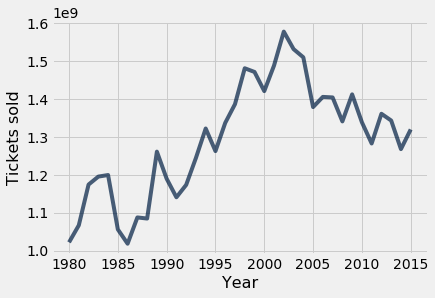

In [82]:
movies.plot('Year', 'Tickets sold')

In [80]:
movies.where('Year', are.between(2000, 2005))

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie,Tickets sold
2004,6.21,9380.5,551,Shrek 2,"1,510,547,504.03"
2003,6.03,9239.7,506,Return of the King,"1,532,288,557.21"
2002,5.8,9155,479,Spider-Man,"1,578,448,275.86"
2001,5.65,8412.5,482,Harry Potter / Sorcerer's Stone,"1,488,938,053.10"
2000,5.39,7661,478,The Grinch,"1,421,335,807.05"


In [84]:
movies.where('Year', are.equal_to(2002))

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie,Tickets sold
2002,5.8,9155,479,Spider-Man,"1,578,448,275.86"


In [85]:
movies.where('Year', 2002)

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie,Tickets sold
2002,5.8,9155,479,Spider-Man,"1,578,448,275.86"


In [83]:
movies.where('#1 Movie', are.containing('Harry Potter'))

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie,Tickets sold
2011,7.93,10174.3,602,Harry Potter / Deathly Hallows (P2),"1,283,013,871.37"
2001,5.65,8412.5,482,Harry Potter / Sorcerer's Stone,"1,488,938,053.10"


In [72]:
movies.take(np.arange(2, 5))

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie,Attendance
2013,8.13,10923.6,688,Catching Fire,"1,343,616,236.16"
2012,7.96,10837.4,667,The Avengers,"1,361,482,412.06"
2011,7.93,10174.3,602,Harry Potter / Deathly Hallows (P2),"1,283,013,871.37"
